In [14]:
from math import pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [95]:
# model parameters:
g = 9.81  # gravity in m s^{-2}
p = 1.091  # average air density in kg m^{-3}
C_D = 0.15  # drag coefficient

### set initial conditions ###
m_s = 50.0  # weight of the rocket in kg
A = pi*0.5**2  # maximum cross sectional area of the rocket in m^{2}
v_e = 325.0  # exhaust speed in m s^{-1}
m_po = 100.0  # initial weight of the rocket propellant

In [96]:
def dotm_p(t):
    if t <= 5.0:
        return 20.0
    else:
        return 0.0

In [171]:
# set time-increment and discretize the time
T = 50  # final time
dt = 0.005  # set time-increment
N = int(T/dt) + 1  # number of time-steps
t = numpy.linspace(0.0, T, N)  # discretize the time using numpy.linspace()

In [172]:
# initialize an array to hold the changing elevation values
m_p = numpy.zeros(N)
m_p[0] = m_po

In [173]:
# time-loop using Euler's method
for n in range(N):
    if n <= 5/dt:
        m_p[n] = m_po - dotm_p(n*dt)*n*dt
    else:
        m_p[n] = 0.0

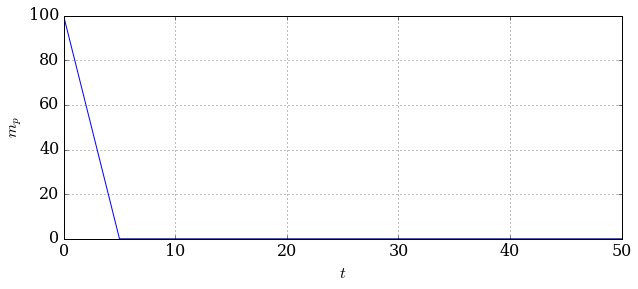

In [174]:
# plot the figure
pyplot.figure(figsize=(10,4))  # set plot size
pyplot.grid(True)  # turn on grid lines
pyplot.xlabel('$t$', fontsize=16)  # x label
pyplot.ylabel('$m_p$', fontsize=16)  # y label
pyplot.plot(t, m_p)

In [175]:
print(m_p[int(3.2/dt)])

36.0


In [176]:
# solve 2nd equation with Euler's method
def f(u):
    v = u[0]
    y = u[1]
    return numpy.array([-g + 1/(m_s + m_p[n])*v_e*dotm_p(n*dt) - 0.5*1/(m_s + m_p[n])*p*v*numpy.abs(v)*A*C_D, v])

In [177]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [178]:
v0 = 0.0  # initial velocity in m s^{-1}
y0 = 0.0  # initial height in m
# initialize the array containing the solution for each time-step
u = numpy.empty((N, 2))
u[0] = numpy.array([v0, y0])  #fill 1st element with initial values

#time loop - Euler method
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [179]:
# get the rocket's height and velocity with respect to the time
v = u[:,0]
y = u[:,1]

(0, 1500)

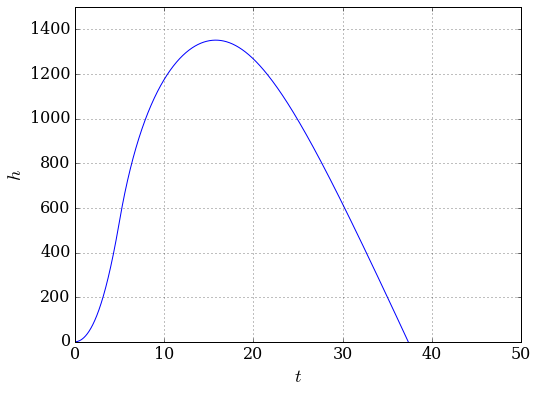

In [180]:
# visualization of the height
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$h$', fontsize=18)
pyplot.plot(t, y)
pyplot.ylim(0, 1500)

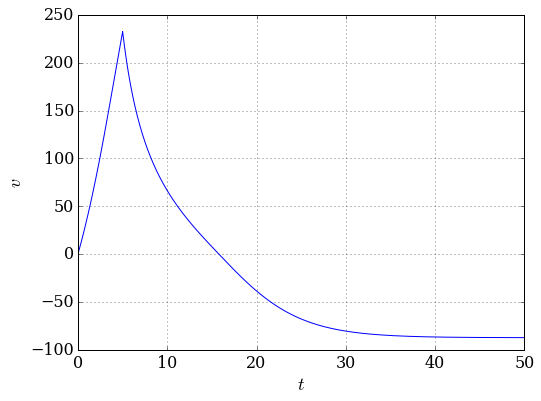

In [181]:
# visualization of the velocity
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$v$', fontsize=18)
pyplot.plot(t, v)

In [182]:
print(u[int(5/dt), 0])

232.426406824


In [183]:
print(u[int(5/dt), 1])

536.961467643


In [184]:
for n in range(N):
    if u[n,0] < 0:
        print(u[n, 1], n*dt)
        break

1351.5171252 15.790000000000001


In [185]:
for n in range(N):
    if u[n,1] < 0:
        print(u[n,0], n*dt)
        break

-86.0028813035 37.365
